In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data

The data is fetched directly from Sciensao's spreadsheet, and consolidated with @vdwnico's original values for the beginning of the time-series.

In [25]:
def consolidate(v1, v2):
    v1 = {k:v for k, v in v1}
    v2 = {k:v for k, v in v2}
    v2.update(v1)
    return [(k, v) for k, v in v2.items()]

def load_data(end):
    # Hospitalizations
    nico_hosps = [
        (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), 
        (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 27), (15, 97), (16, 163), 
        (17, 265), (18, 368), (19, 496), (20, 649), (21, 842), (22, 1097), (23, 1381), (24, 1644), 
        (25, 1881), (26, 2138), (27, 2718), (28, 3072), (29, 3644), (30, 4081), (31, 4474), (32, 4886), 
        (33, 4979), (34, 5210), (35, 5362), (36, 5497), (37, 5514), (38, 5606), (39, 5744), (40, 5699), 
        (41, 5597), (42, 5618), (43, 5645), (44, 5419), (45, 5423), (46, 5536), (47, 5515), (48, 5309), 
        (49, 5161), (50, 5069), (51, 4871), (52, 4920), (53, 4976), (54, 4765), (55, 4527)] # last == April 22

    df = pd.read_excel("https://epistat.sciensano.be/Data/COVID19BE.xlsx", sheet_name="HOSP")
    sciensano_hosps = df.groupby("DATE")["TOTAL_IN"].sum()   # start on March 15
    sciensano_hosps = [(i+17, v) for i, v in enumerate(sciensano_hosps)]
    hosps = consolidate(sciensano_hosps, nico_hosps)
    
    new_in = df.groupby("DATE")["NEW_IN"].sum()
    new_in = [(i+17, v) for i, v in enumerate(new_in)]
    new_in = consolidate(new_in, [(i,0) for i in range(1, 17)])
    
    new_out = df.groupby("DATE")["NEW_OUT"].sum()
    new_out = [(i+17, v) for i, v in enumerate(new_out)]
    new_out = consolidate(new_out, [(i,0) for i in range(1, 17)])
    
    # ICUs
    nico_icus = [
        (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), 
        (9, 0), (10, 0), (11, 0), (12, 0), (13, 2), (14, 15), (15, 24), (16, 33), 
        (17, 53), (18, 79), (19, 100), (20, 130), (21, 164), (22, 238), (23, 290), (24, 322), 
        (25, 381), (26, 474), (27, 605), (28, 690), (29, 789), (30, 867), (31, 927), (32, 1021), 
        (33, 1088), (34, 1144), (35, 1205), (36, 1245), (37, 1261), (38, 1267), (39, 1260), (40, 1276), 
        (41, 1285), (42, 1278), (43, 1262), (44, 1232), (45, 1234), (46, 1226), (47, 1204), (48, 1182), 
        (49, 1140), (50, 1119), (51, 1081), (52, 1071), (53, 1079), (54, 1020), (55, 993)] 

    df = pd.read_excel("https://epistat.sciensano.be/Data/COVID19BE.xlsx", sheet_name="HOSP")
    sciensano_icus = df.groupby("DATE")["TOTAL_IN_ICU"].sum()   # start on March 15
    sciensano_icus = [(i+17, v) for i, v in enumerate(sciensano_icus)]
    icus = consolidate(sciensano_icus, nico_icus)
    
    # Daily deaths
    nico_deaths = [
        (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), 
        (9, 0), (10, 0), (11, 0), (12, 0), (13, 1), (14, 3), (15, 3), (16, 5), 
        (17, 5), (18, 10), (19, 10), (20, 19), (21, 25), (22, 27), (23, 36), (24, 46), 
        (25, 75), (26, 69), (27, 91), (28, 91), (29, 115), (30, 128), (31, 133), (32, 158), 
        (33, 172), (34, 238), (35, 193), (36, 224), (37, 269), (38, 225), (39, 267), (40, 299), 
        (41, 321), (42, 275), (43, 323), (44, 283), (45, 338), (46, 270), (47, 262), (48, 266), 
        (49, 240), (50, 191), (51, 98), (52, 22), (53, 170), (54, 266), (55, 230)]

    df = pd.read_excel("https://epistat.sciensano.be/Data/COVID19BE.xlsx", sheet_name="MORT")
    sciensano_deaths = df.groupby("DATE")["DEATHS"].sum()   # start on March 10
    sciensano_deaths = [(i+12, v) for i, v in enumerate(sciensano_deaths)]
    deaths = consolidate(sciensano_deaths, nico_deaths)
    
    # Convert to pandas 
    data = pd.DataFrame({
        "n_hospitalized": [i for _ , i in hosps],
        "n_hospitalized_in": [i for _, i in new_in],
        "n_hospitalized_out": [i for _, i in new_out],
        "n_icu": [i for _, i in icus],
        "n_daily_deaths": [i for _, i in deaths],
        "date": pd.date_range(start="2020-02-28", end=end)
    }, index=range(1, len(hosps)+1))

    data["n_deaths"] = data["n_daily_deaths"].cumsum()
    
    return data

In [26]:
data = load_data(end="2020-04-25")

In [27]:
data.tail(10)

,n_hospitalized,n_hospitalized_in,n_hospitalized_out,n_icu,n_daily_deaths,date,n_deaths
49,5181,320,399,1140,249,2020-04-16,5598
50,5088,303,387,1119,199,2020-04-17,5797
51,4892,265,409,1081,200,2020-04-18,5997
52,4940,232,138,1071,217,2020-04-19,6214
53,4996,172,106,1079,199,2020-04-20,6413
54,4765,263,432,1020,211,2020-04-21,6624
55,4527,211,367,993,195,2020-04-22,6819
56,4355,210,322,970,167,2020-04-23,6986
57,4195,217,295,934,90,2020-04-24,7076
58,3959,204,368,891,18,2020-04-25,7094


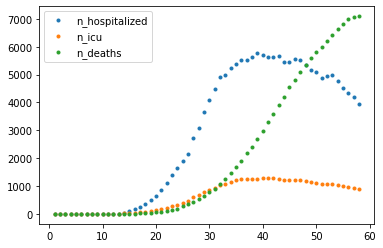

In [5]:
data[["n_hospitalized", "n_icu", "n_deaths"]].plot(style=".")

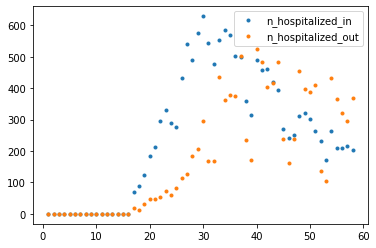

In [28]:
data[["n_hospitalized_in", "n_hospitalized_out"]].plot(style=".")

# SEIR model

Python re-implementation of Nicolas' original SEIR model.

In [60]:
hyper_parameters = {
    "frac_dh": 2985 / 6490,  # deaths in hospitals / total deaths
    "hh": 0.05,              # fraction of hospitalized 
    "gamma": 1 / 12.4,       # inverse recovery time"
    "epsilon": 1 / 5.2,      # inverse incubation time 
    "dea": 0.5,              # fatality rate in icu 
    "n0": 11000000,          # population size
    "n0_MRS": 400000,        # population en MR/MRS + personnel soignant
    "window": 6,             # size of the window for fitting Re's"
}

def smoothen(v, n_pts=hyper_parameters["window"]):
    box = np.ones(n_pts) / n_pts
    return np.convolve(v, box, mode="same")

def SEIR(r0, i0=3, gg=0.75, n_futures=0, opts=hyper_parameters):   
    # Load hyper-parameters
    hh = opts["hh"]
    gamma = opts["gamma"]
    epsilon = opts["epsilon"]
    dea = opts["dea"]
    n0 = opts["n0"]
    n0_MRS = opts["n0_MRS"]
    window = opts["window"]
    
    # Smoothen and extend R0s
    r0 = smoothen(r0)
    r0 = np.concatenate((r0, np.array([r0[-1]] * (window + n_futures))))
    
    # Initial conditions
    drea = dea * 1 / 5
    rrea = (1 - dea) * 1 / 20
    hospi = 0.0
    
    n = [n0-n0_MRS]
    i = [i0]
    e = [i[-1] * 37]
    h = [0.0]
    h_in = [0.0]
    h_out = [0.0]
    l = [0.0]
    r = [0.0]
    m = [0.0]
    s = [n[-1] - e[-1] - i[-1] - r[-1]]
    
    # Simulate forward
    n_days = len(r0)
    
    for day in range(n_days):
        lam = gamma * r0[day]
        
        if day == 14:
            hospi = hh / 7
            
        ds = -lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1]
        de = lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1] - epsilon * e[-1]
        di = epsilon * e[-1] - gamma * i[-1] - hospi * i[-1]
        dh = hospi * i[-1] - gg * h[-1] / 7 - (1 - gg) * h[-1] / (4 + 2 * np.tanh((l[-1]-500)/300))
        dl = (1 - gg) * h[-1] / (4 + 2 * np.tanh((l[-1]-500)/300)) - drea * l[-1] - rrea * l[-1]
        dh_in = hospi * i[-1]
        dh_out = rrea * l[-1] + gg * h[-1] / 7 + drea * l[-1] 
        dr = gamma * i[-1] + rrea * l[-1] + gg * h[-1] / 7
        dm = drea * l[-1] 
        
        s.append(s[-1] + ds)
        e.append(e[-1] + de)
        i.append(i[-1] + di)
        h.append(h[-1] + dh)
        l.append(l[-1] + dl)
        if l[-1] > 1895:
            dm = dm + (l[-1] - 1895)
            l[-1] = 1895
        h_in.append(dh_in)
        h_out.append(dh_out)
        r.append(r[-1] + dr)
        m.append(m[-1] + dm)
        n.append(s[-1] + e[-1] + i[-1] + h[-1] + l[-1] + r[-1])
        
    return np.array(s), np.array(e), np.array(i), np.array(h), np.array(l), np.array(h_in), np.array(h_out), np.array(m), np.array(r)

def SEIR_MRS(r0_mrs, n_futures=0, opts=hyper_parameters):
    # Load hyper-parameters
    gamma = opts["gamma"]
    epsilon = opts["epsilon"]
    n0_MRS = opts["n0_MRS"]
    window = opts["window"]
    
    # Smoothen and extend R0s
    r0_mrs = smoothen(r0_mrs)
    r0_mrs = np.concatenate((r0_mrs, np.array([r0_mrs[-1]] * (window + n_futures))))
    
    # Initial conditions
    alpha = 0.15 / 10
    lam = gamma * 4.3
    
    n = [n0_MRS]
    i = [1]
    e = [i[-1]*20]
    r = [0.0]
    s = [n[-1] - e[-1] - i[-1] - r[-1]]
    m = [0.0]
    
    # Simulate forward
    n_days = len(r0_mrs)
    
    for day in range(n_days):
        lam = gamma * r0_mrs[day]
        
        ds = -lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1]
        de = lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1] - epsilon * e[-1]
        di = epsilon * e[-1] - (gamma + alpha) * i[-1]
        dr = gamma * i[-1]
        dm = alpha * i[-1]
        
        s.append(s[-1] + ds)
        e.append(e[-1] + de)
        i.append(i[-1] + di)
        r.append(r[-1] + dr)
        m.append(m[-1] + dm)
        n.append(s[-1] + e[-1] + i[-1] + r[-1])
        
    return np.array(s), np.array(e), np.array(i), np.array(m), np.array(r)   

def simulate(theta, n_futures=0):   
    # Unpack parameters
    r0, r0_mrs, i0, gg = theta
    
    # Simulate
    s, e, i, h, l, h_in, h_out, m, r = SEIR(r0, i0=i0, gg=gg, n_futures=n_futures)
    _, _, _, m_mrs, _ = SEIR_MRS(r0_mrs, n_futures=n_futures)
    
    return s, e, i, h, l, m, m_mrs, r

In [61]:
# Log-likelihood functions and samplers
from scipy.stats import norm, poisson
from scipy.special import gammaln

def normal_logpdf(x, mu, sigma=1):
    return norm.logpdf(x, loc=mu, scale=sigma).sum()

def normal_rvs(mu, sigma=1, random_state=None):
    return norm.rvs(loc=mu, scale=sigma, random_state=random_state)

def poisson_logpdf(x, mu, sigma=None):
    return (x * np.log(mu.astype(float) + 1e-10) - mu - gammaln(x.astype(float) + 1e-10)).sum()

def poisson_rvs(mu, sigma=None, random_state=None):
    return poisson.rvs(mu, random_state=random_state)

# Parameter fit

The procedure is different from Nicolas'. All parameters are fit jointly, instead of using a greedy procedure to fit parameters sequentially. Results are therefore slightly different.

In [77]:
from scipy.optimize import minimize

# Pack-unpack helpers for passing parameters around
def pack(r0, r0_rms, i0, gg):
    v = np.zeros(len(r0) + len(r0_rms) + 2)
    v[:len(r0)] = r0
    v[len(r0):len(r0)+len(r0_rms)] = r0_rms
    v[-2] = i0
    v[-1] = gg
    return v 

def unpack(v):
    return v[:(len(v)-2)//2], v[(len(v)-2)//2:len(v)-2], v[-2], v[-1]

# Fit
def fit(data, logpdf=poisson_logpdf, opts=hyper_parameters):
    # Load hyper-parameters
    window = opts["window"]
    frac_dh = opts["frac_dh"]
    
    # Cost
    def cost(x):
        # parameters
        r0, r0_mrs, i0, gg = unpack(x)

        # cost
        c = 0.0

        s, e, i, h, l, h_in, h_out, m, r = SEIR(r0, i0=i0, gg=gg)
        c -= logpdf(data["n_hospitalized"].values[9:], mu=h[10:]+l[10:])
        c -= logpdf(data["n_icu"].values[9:], mu=l[10:])
        #c -= logpdf(data["n_hospitalized_in"].values[16:], mu=h_in[17:])
        #c -= logpdf(data["n_hospitalized_out"].values[16:], mu=h_out[17:])
        c -= logpdf(frac_dh * data["n_deaths"].values[9:-2], mu=m[10:-2])

        # fit on deaths with SEIR_MRS
        s, e, i, m_mrs, r = SEIR_MRS(r0_mrs)
        c -= logpdf(data["n_deaths"].values[:-2], mu=m[1:-2] + m_mrs[1:-2])

        # ^ we omit the last two death data points, because not consolidated yet

        return c
 
    # x0
    r0 = [4.3] * (len(data) - window)
    r0_rms = [4.3] * (len(data) - window)
    i0 = 3.0
    gg = 0.75
    x0 = pack(r0, r0_rms, i0, gg)

    # bounds
    bounds = []
    for _ in range(len(r0)):
        bounds.append((0.3, 5.0))
    for _ in range(len(r0_rms)):
        bounds.append((0.3, 6.3))
    bounds.append((1, 50))
    bounds.append((0.65, 0.85))

    # fit
    res = minimize(cost, x0=x0, bounds=bounds, options={"maxfun": 100000})
    
    return unpack(res.x)

In [78]:
theta = fit(data)
r0, r0_mrs, i0, gg = theta
print(r0)
print(r0_mrs)
print(i0)
print(gg)

[5.         5.         5.         5.         5.         5.
 5.         5.         4.99990821 5.         3.68422527 2.34989711
 4.56187558 3.48100381 1.43612752 1.88301068 3.28340758 4.79878229
 4.99799301 4.73022646 4.74724231 4.99837508 3.05789285 0.64297361
 0.33933415 0.3        0.3        0.3        0.3        0.3
 0.3        0.3        0.3        0.3        0.3        0.3
 0.52304311 1.42373358 1.83389796 1.8447728  1.49757349 0.86450714
 0.6073589  0.30313291 0.34504318 0.30113686 1.58264764 0.30491387
 0.43737801 0.3        0.3        0.3       ]
[2.87942279 3.1725825  3.51548326 3.79439527 4.07181578 4.34957902
 4.62464753 4.87751283 5.09368143 5.26913431 5.3912044  5.45183259
 5.45003843 5.38728243 5.27469879 5.1125984  4.91218235 4.68171348
 4.42364517 4.1429354  3.85204184 3.56698802 3.30900216 3.102616
 2.96414703 2.90086515 2.91290176 2.97051953 3.01968404 3.03769976
 2.99520746 2.85573467 2.58384551 2.18112387 1.63892432 0.97306216
 0.3        0.3        0.3        0.3   

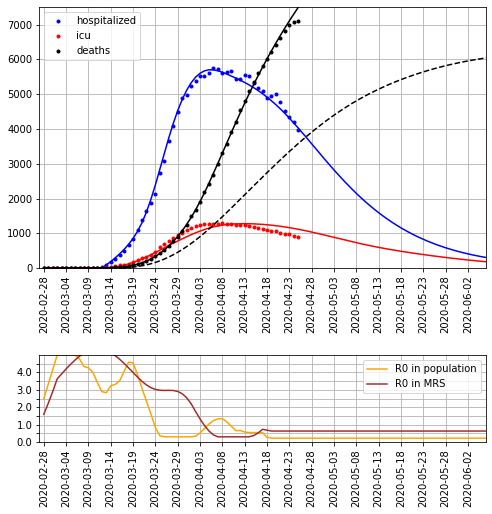

In [79]:
# Plots
n_futures = 365
s, e, i, h, l, m, m_mrs, r = simulate(theta, n_futures=n_futures)
n_days = len(data)

fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={"height_ratios": (3,1)})

# Plot hospitalizations, icus and deaths
ax[0].plot(range(1, n_days+1 + n_futures), h[1:]+l[1:], c="b")
ax[0].plot(range(1, n_days+1), data["n_hospitalized"].values, ".", c="b", label="hospitalized")
ax[0].plot(range(1, n_days+1 + n_futures), l[1:], c="r")
ax[0].plot(range(1, n_days+1), data["n_icu"].values, ".", c="r", label="icu")
ax[0].plot(range(1, n_days+1 + n_futures), m[1:] + m_mrs[1:], c="k")
ax[0].plot(range(1, n_days+1 + n_futures), m[1:], "--", c="k")
ax[0].plot(range(1, n_days+1), data["n_deaths"].values, ".", c="k", label="deaths")
ax[0].grid()
ax[0].set_ylim(0, 7500)
ax[0].set_xlim(0, 100)
ax[0].set_xticks(np.arange(1, 100, 5))
ax[0].set_xticklabels([d.strftime('%Y-%m-%d') for d in pd.date_range(start="2020-02-28", end="2020-12-31")[:100:5]], rotation=90)
ax[0].legend()

# Plots R0s
window = hyper_parameters["window"]
_r0 = smoothen(r0)
_r0_mrs = smoothen(r0_mrs)
_r0 = np.concatenate((_r0, np.array([_r0[-1]] * (window + n_futures))))
_r0_mrs = np.concatenate((_r0_mrs, np.array([_r0_mrs[-1]] * (window + n_futures))))

ax[1].plot(range(1, n_days+1 + n_futures), _r0, c="orange", label="R0 in population")
ax[1].plot(range(1, n_days+1 + n_futures), _r0_mrs, c="brown", label="R0 in MRS")
ax[1].grid(which="both")
ax[1].set_ylim(0, 5)
ax[1].set_yticks(np.arange(0, 5, step=0.5))

for j, label in enumerate(ax[1].get_yticklabels()):
    if j % 2 != 0:
        label.set_visible(False)
ax[1].set_xlim(0, 100)
ax[1].set_xticks(np.arange(1, 100, 5))
ax[1].set_xticklabels([d.strftime('%Y-%m-%d') for d in pd.date_range(start="2020-02-28", end="2020-12-31")[:100:5]], rotation=90)
ax[1].legend()

plt.subplots_adjust(hspace=0.5)

plt.savefig("plot.png")
plt.show()

# Parametric bootstrap

In [11]:
from copy import deepcopy
from joblib import Parallel, delayed

def _fit(data, h, l, m, m_mrs, seed, logpdf=poisson_logpdf, rvs=poisson_rvs):
    data_i = deepcopy(data)
    rs = np.random.RandomState(seed=seed)
    
    # resample
    data_i["n_hospitalized"] = rvs(h[1:] + l[1:], random_state=rs)
    data_i["n_icu"] = rvs(l[1:], random_state=rs)
    data_i["n_deaths"] = rvs(m[1:] + m_mrs[1:], random_state=rs)
    
    # fit on bootstrap
    theta_i = fit(data_i, logpdf=logpdf)
    
    return theta_i

def parametric_bootstrap(data, n_replicas=1, logpdf=poisson_logpdf, n_jobs=-1):
    # Best fit on original data
    theta_mle = fit(data, logpdf=logpdf)
    _, _, _, h, l, m, m_mrs, _ = simulate(theta_mle)
    
    # Bootstrap    
    thetas_bootstrap = Parallel(n_jobs=n_jobs, verbose=5, backend="multiprocessing")(
        delayed(_fit)(data, h, l, m, m_mrs, i) for i in range(n_replicas))
        
    return theta_mle, thetas_bootstrap

In [12]:
# this will take a while...
theta_mle, thetas_bootstrap = parametric_bootstrap(data, n_replicas=100, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 54.1min finished


In [14]:
# Plots
n_futures = 365
n_days = len(data)
window = hyper_parameters["window"]

bootstraps = {
    "h": [],
    "l": [],
    "m": [],
    "m_mrs": [],
    "r0": [],
    "r0_mrs": []
}

for theta_i in thetas_bootstrap:
    _, _, _, h, l, m, m_mrs, _ = simulate(theta_i, n_futures=n_futures)
    bootstraps["h"].append(h)
    bootstraps["l"].append(l)
    bootstraps["m"].append(m)
    bootstraps["m_mrs"].append(m_mrs)
    
    r0, r0_mrs, _, _ = theta_i    
    _r0 = smoothen(r0)
    _r0_mrs = smoothen(r0_mrs)
    _r0 = np.concatenate((_r0, np.array([_r0[-1]] * (window + n_futures))))
    _r0_mrs = np.concatenate((_r0_mrs, np.array([_r0_mrs[-1]] * (window + n_futures))))
    
    bootstraps["r0"].append(_r0)
    bootstraps["r0_mrs"].append(_r0_mrs)
    
for k, v in bootstraps.items():
    bootstraps[k] = np.array(v)

In [15]:
hl_50 = np.percentile(bootstraps["h"]+bootstraps["l"], 50, axis=0)
hl_10 = np.percentile(bootstraps["h"]+bootstraps["l"], 10, axis=0)
hl_90 = np.percentile(bootstraps["h"]+bootstraps["l"], 90, axis=0)

l_50 = np.percentile(bootstraps["l"], 50, axis=0)
l_10 = np.percentile(bootstraps["l"], 10, axis=0)
l_90 = np.percentile(bootstraps["l"], 90, axis=0)

m_50 = np.percentile(bootstraps["m"]+bootstraps["m_mrs"], 50, axis=0)
m_10 = np.percentile(bootstraps["m"]+bootstraps["m_mrs"], 10, axis=0)
m_90 = np.percentile(bootstraps["m"]+bootstraps["m_mrs"], 90, axis=0)

r0_50 = np.percentile(bootstraps["r0"], 50, axis=0)
r0_10 = np.percentile(bootstraps["r0"], 10, axis=0)
r0_90 = np.percentile(bootstraps["r0"], 90, axis=0)

r0_mrs_50 = np.percentile(bootstraps["r0_mrs"], 50, axis=0)
r0_mrs_10 = np.percentile(bootstraps["r0_mrs"], 10, axis=0)
r0_mrs_90 = np.percentile(bootstraps["r0_mrs"], 90, axis=0)

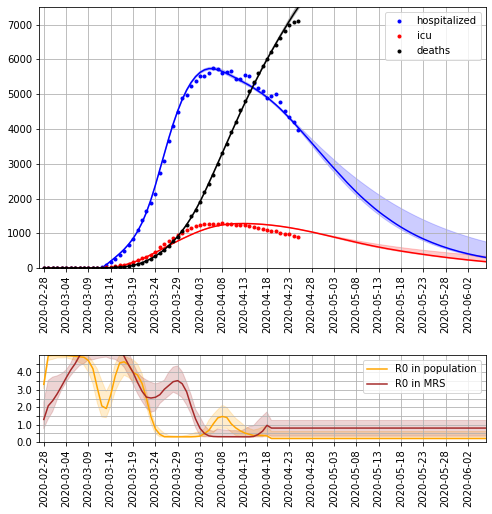

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={"height_ratios": (3,1)})

# Plot hospitalizations, icus and deaths
ax[0].plot(range(1, n_days+1 + n_futures), hl_50[1:], c="b")
ax[0].fill_between(range(1, n_days+1 + n_futures), hl_10[1:], hl_90[1:], color="b", alpha=0.2)
ax[0].plot(range(1, n_days+1), data["n_hospitalized"].values, ".", c="b", label="hospitalized")

ax[0].plot(range(1, n_days+1 + n_futures), l_50[1:], c="r")
ax[0].fill_between(range(1, n_days+1 + n_futures), l_10[1:], l_90[1:], color="r", alpha=0.2)
ax[0].plot(range(1, n_days+1), data["n_icu"].values, ".", c="r", label="icu")

ax[0].plot(range(1, n_days+1 + n_futures), m_50[1:], c="k")
ax[0].fill_between(range(1, n_days+1 + n_futures), m_10[1:], m_90[1:], color="k", alpha=0.2)
ax[0].plot(range(1, n_days+1), data["n_deaths"].values, ".", c="k", label="deaths")

ax[0].grid()
ax[0].set_ylim(0, 7500)
ax[0].set_xlim(0, 100)
ax[0].set_xticks(np.arange(1, 100, 5))
ax[0].set_xticklabels([d.strftime('%Y-%m-%d') for d in pd.date_range(start="2020-02-28", end="2020-12-31")[:100:5]], rotation=90)
ax[0].legend()

# Plots R0s
ax[1].plot(range(1, n_days+1 + n_futures), r0_50, c="orange", label="R0 in population")
ax[1].fill_between(range(1, n_days+1 + n_futures), r0_10, r0_90, color="orange", alpha=0.2)

ax[1].plot(range(1, n_days+1 + n_futures), r0_mrs_50, c="brown", label="R0 in MRS")
ax[1].fill_between(range(1, n_days+1 + n_futures), r0_mrs_10, r0_mrs_90, color="brown", alpha=0.2)

ax[1].grid(which="both")
ax[1].set_ylim(0, 5)
ax[1].set_yticks(np.arange(0, 5, step=0.5))
for j, label in enumerate(ax[1].get_yticklabels()):
    if j % 2 != 0:
        label.set_visible(False)
ax[1].set_xlim(0, 100)
ax[1].set_xticks(np.arange(1, 100, 5))
ax[1].set_xticklabels([d.strftime('%Y-%m-%d') for d in pd.date_range(start="2020-02-28", end="2020-12-31")[:100:5]], rotation=90)
ax[1].legend()

plt.subplots_adjust(hspace=0.5)

plt.savefig("plot-bootstrap.png")
plt.show()